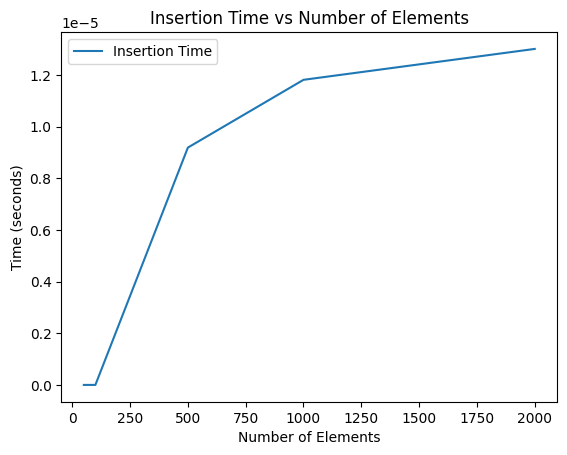

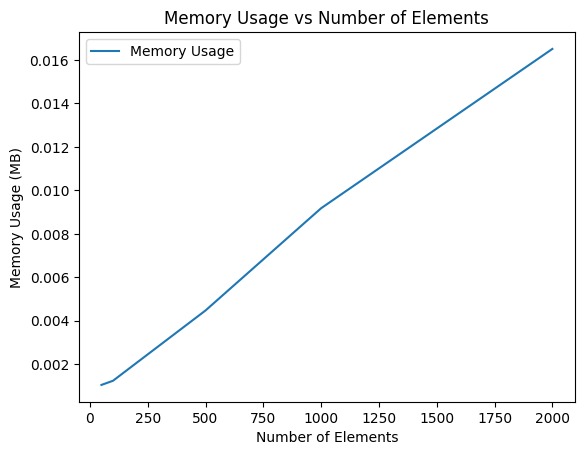

In [13]:
import time
import tracemalloc
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, is_leaf=True):
        self.keys = []
        self.children = []
        self.is_leaf = is_leaf

class BTree:
    def __init__(self, t):
        self.root = TreeNode()
        self.t = t

    def insert(self, key):
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            new_root = TreeNode(is_leaf=False)
            new_root.children.append(root)
            self._split_child(new_root, 0)
            self.root = new_root
            self._insert_non_full(new_root, key)
        else:
            self._insert_non_full(root, key)

    def _insert_non_full(self, node, key):
        i = len(node.keys) - 1
        if node.is_leaf:
            node.keys.append(None)
            while i >= 0 and key < node.keys[i]:
                node.keys[i + 1] = node.keys[i]
                i -= 1
            node.keys[i + 1] = key
        else:
            while i >= 0 and key < node.keys[i]:
                i -= 1
            i += 1
            if len(node.children[i].keys) == (2 * self.t) - 1:
                self._split_child(node, i)
                if key > node.keys[i]:
                    i += 1
            self._insert_non_full(node.children[i], key)

    def _split_child(self, parent, index):
        t = self.t
        child = parent.children[index]
        new_child = TreeNode(is_leaf=child.is_leaf)
        parent.children.insert(index + 1, new_child)
        parent.keys.insert(index, child.keys[t - 1])
        new_child.keys = child.keys[t: (2 * t) - 1]
        child.keys = child.keys[:t - 1]
        if not child.is_leaf:
            new_child.children = child.children[t:]
            child.children = child.children[:t]

# Функція для вимірювання часу і пам'яті
def measure_performance(tree, elements):
    insertion_times = []
    memory_usage = []
    for element in elements:
        start_time = time.time()
        tracemalloc.start()
        
        tree.insert(element)
        
        end_time = time.time()
        insertion_times.append(end_time - start_time)
        
        current, peak = tracemalloc.get_traced_memory()
        memory_usage.append(peak / 10**6)  # Convert bytes to megabytes
        tracemalloc.stop()
    return insertion_times, memory_usage

# Приклад використання:
sizes = [50, 100, 500, 1000, 2000]
insertion_times_all = []
memory_usage_all = []

for size in sizes:
    b_tree = BTree(2)
    elements = list(range(1, size + 1))
    insertion_times, memory_usage = measure_performance(b_tree, elements)
    insertion_times_all.append(sum(insertion_times) / size)  # Середній час вставки
    memory_usage_all.append(max(memory_usage))  # Максимальне використання пам'яті

# Побудова графіків
plt.plot(sizes, insertion_times_all, label='Insertion Time')
plt.xlabel('Number of Elements')
plt.ylabel('Time (seconds)')
plt.title('Insertion Time vs Number of Elements')
plt.legend()
plt.show()

plt.plot(sizes, memory_usage_all, label='Memory Usage')
plt.xlabel('Number of Elements')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage vs Number of Elements')
plt.legend()
plt.show()
